<div style="background-color: rgba(247, 200, 115, 0.3); padding: 30px 0;">
    <div style="max-width: 800px; margin: 0 auto; text-align: center;">
        <h1 style="font-size: 48px; color: #cc7a00; margin-bottom: 10px;">🚀 Machine Learning 📊</h1>
        <h3 style="font-size: 28px; color: #cc7a00; margin-bottom: 10px;">Naïve Bayes & KNN</h3>
        <h4 style="font-size: 18px; color: #cc7a00;"><a href="https://www.linkedin.com/in/mohammadreza-qaderi/" style="color: #1e90ff; text-decoration: none;">MohammadReza Qaderi</a></h4>
        <h4 style="font-size: 18px; color: #cc7a00;"><a href="https://github.com/MR-Qaderi/MachineLearningCourseMaterials" style="color: #1e90ff; text-decoration: none;">GitHub Repository</a></h4>
    </div>
</div>


## Naive Bayes Classification

Naive Bayes is a classification algorithm based on Bayes' theorem, a fundamental probability theorem. It is particularly well-suited for text and categorical data, making it a popular choice for tasks like spam detection, sentiment analysis, and document classification. Naive Bayes is known for its simplicity, efficiency, and effectiveness in certain scenarios.

### Bayes' Theorem

At the core of Naive Bayes is Bayes' theorem, which relates conditional probabilities of events. The theorem is as follows:
P(A|B) = (P(B|A) * P(A)) / P(B)

Where:
- `P(A|B)` is the probability of event A occurring given event B has occurred.
- `P(B|A)` is the probability of event B occurring given event A has occurred.
- `P(A)` and `P(B)` are the probabilities of events A and B occurring, respectively.

<img src = "https://editor.analyticsvidhya.com/uploads/34725nv1.png" width=50%>

### Naive Assumption

The "Naive" in Naive Bayes refers to the assumption of feature independence. This assumption simplifies the calculations significantly. Although it's rarely true in real-world data, Naive Bayes can still perform well when this assumption is approximately met or when certain features are conditionally independent given the class.

### Types of Naive Bayes

There are several variants of Naive Bayes, including:
- **Gaussian Naive Bayes**: Assumes that features follow a Gaussian (normal) distribution.
- **Multinomial Naive Bayes**: Suitable for discrete count data, often used in text classification.
- **Bernoulli Naive Bayes**: Specifically designed for binary or Boolean features.

### Workflow

The Naive Bayes classification workflow involves:
1. **Data Preparation**: Convert categorical and text features into numerical representations using techniques like one-hot encoding or TF-IDF.
2. **Training**: Estimate the probabilities of features given each class using training data.
3. **Prediction**: Calculate the probabilities of each class given the features of a new instance and select the most probable class.

<img src = "https://editor.analyticsvidhya.com/uploads/30337nv.png" width=50%>
<img src = "https://editor.analyticsvidhya.com/uploads/75704nv3.png" width=50%>
<img src = "https://editor.analyticsvidhya.com/uploads/60483nv4.png" width=50%>
<img src = "https://editor.analyticsvidhya.com/uploads/67866nv5.png" width=50%>

### Advantages

Naive Bayes offers several advantages:
- It's fast and efficient.
- Works well with high-dimensional data.
- Handles missing values effectively.
- Performs surprisingly well in certain scenarios, even with the naive independence assumption.

### Limitations

However, Naive Bayes has limitations:
- The naive independence assumption might not hold in many real-world cases.
- May not perform well on highly correlated features.
- Sensitive to irrelevant features.
- Not suitable for tasks requiring precise probability estimates.

In summary, Naive Bayes is a simple and powerful classification algorithm that relies on Bayes' theorem and the naive assumption of feature independence. It's particularly well-suited for text and categorical data and can serve as a baseline model in many classification tasks.


## EDA

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [105]:
data = pd.read_csv('Social_Network_Ads.csv')

In [106]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [108]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [109]:
pd.crosstab(data.Gender,data.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [111]:
data.groupby('Purchased')['EstimatedSalary'].mean().reset_index()

,Purchased,EstimatedSalary
0,0,60544.747082
1,1,86272.727273


In [113]:
data.groupby('Gender')['EstimatedSalary'].mean().reset_index()

,Gender,EstimatedSalary
0,Female,71759.803922
1,Male,67642.857143


## Pre Processing

In [116]:
x = data.iloc[:, [1, 2, 3]]
y = data.iloc[:, -1]

In [117]:
x

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [118]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

### Categorical Data

In [119]:
# Perform one-hot encoding using pandas' get_dummies function
x = pd.get_dummies(x, columns=["Gender"])

x

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [125]:
x_test

,Age,EstimatedSalary,Gender_Female,Gender_Male
209,46,22000,1,0
280,59,88000,1,0
33,28,44000,1,0
210,48,96000,1,0
93,29,28000,1,0
...,...,...,...,...
314,39,79000,1,0
373,59,130000,0,1
380,42,64000,0,1
239,53,143000,1,0


In [127]:
from sklearn.preprocessing import StandardScaler
# Columns to be scaled
numerical_columns = ['Age', 'EstimatedSalary']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on x_train
x_train_scaled = x_train.copy()
x_train_scaled[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])

# Transform the scaler on x_test
x_test_scaled = x_test.copy()
x_test_scaled[numerical_columns] = scaler.transform(x_test[numerical_columns])

In [69]:
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

In [128]:
x_train_scaled

,Age,EstimatedSalary,Gender_Female,Gender_Male
247,1.892589,1.521894,1,0
110,0.125038,0.032132,1,0
16,0.910616,-1.311575,0,1
66,-1.347922,-1.486841,0,1
153,-0.169554,-0.581299,1,0
...,...,...,...,...
71,-1.347922,-1.253153,1,0
106,-1.151527,-1.019465,1,0
270,0.517827,1.843215,1,0
348,0.125038,0.207398,0,1


In [130]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Gaussian Naïve Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier on the scaled training data
naive_bayes_classifier.fit(x_train_scaled, y_train)

# Predict on the scaled test data
y_pred = naive_bayes_classifier.predict(x_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)

Accuracy: 0.91


### Evaluation Metrics Explanation and Formulas

- **Accuracy**:
  - **Meaning**: Accuracy measures the proportion of correctly predicted instances out of the total instances. It provides a general assessment of the model's correctness.
  - **Formula**: (TP + TN) / (TP + TN + FP + FN)
    - TP: True Positives
    - TN: True Negatives
    - FP: False Positives
    - FN: False Negatives
      <img src = "https://www.sarthaks.com/?qa=blob&qa_blobid=15940634805819742480" width=50%>
    

- **Precision**:
  - **Meaning**: Precision measures the ratio of correctly predicted positive instances to the total predicted positive instances. It assesses the model's ability to avoid false positives.
  - **Formula**: TP / (TP + FP)
    - TP: True Positives
    - FP: False Positives

- **Recall**:
  - **Meaning**: Recall, also known as sensitivity or true positive rate, measures the ratio of correctly predicted positive instances to the actual positive instances. It gauges the model's ability to capture all positive instances.
  - **Formula**: TP / (TP + FN)
    - TP: True Positives
    - FN: False Negatives
      <img src = "https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/639c3cc56bda8713d4a2f29c_precision-recall.webp" width=50%>

- **F1-score**:
  - **Meaning**: F1-score is the harmonic mean of precision and recall. It provides a balanced metric that considers both false positives and false negatives.
  - **Formula**: 2 * (Precision * Recall) / (Precision + Recall)
    - Precision: Precision metric value
    - Recall: Recall metric value
       <img src = "https://hasty.ai/media/pages/docs/mp-wiki/metrics/f-beta-score/f251ccbadc-1684142768/snimok-ekrana-2022-06-10-v-12-51-17.webp" width=50%>

- **Confusion Matrix**:
  - **Meaning**: The confusion matrix provides a tabular representation of the model's predictions versus actual outcomes. It helps visualize different types of prediction results.
  - **Formula**: Not applicable; it's a matrix of observed counts.
  <img src = "https://research.aimultiple.com/wp-content/uploads/2019/07/positive-negative-true-false-matrix.png" width=50%>

Each metric and its formula serves a specific purpose in assessing the performance of classification models. Accuracy gives a holistic view, precision emphasizes minimizing false positives, recall focuses on capturing positives, and the F1-score balances precision and recall. The confusion matrix offers a comprehensive summary of predictions.


## Evaluation

In [132]:
from sklearn.metrics import classification_report

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.91
Precision: 0.9375
Recall: 0.8108108108108109
F1-score: 0.8695652173913043
Confusion Matrix:
[[61  2]
 [ 7 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        63
           1       0.94      0.81      0.87        37

    accuracy                           0.91       100
   macro avg       0.92      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



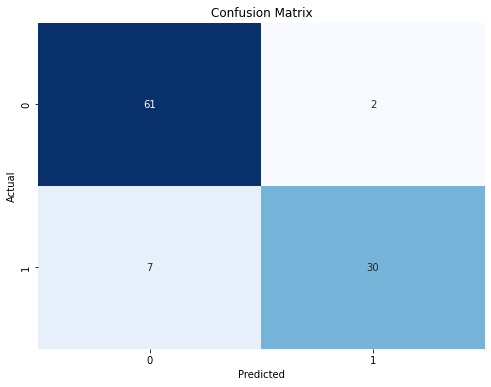

In [134]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# KNN(K-Nearest Neighbors)

<img src = "https://www.jcchouinard.com/wp-content/uploads/2021/08/image-8.png" width=50%>

<img src = "https://www.saedsayad.com/images/KNN_similarity.png" width=50%>

<img src = "https://i.postimg.cc/SQLhv9Dn/1-v-At-QZb-ROu-Tdp36a-QQ8cq-BA.png" width=75%>

<img src = "https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png" width=50%>

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
# Load the dataset
data = pd.read_csv("Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [138]:
# Select features and target variable
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [139]:
X

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [140]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# Feature scaling and one-hot encoding
column_transformer = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), ['Age', 'EstimatedSalary']),
    ('encoder', OneHotEncoder(drop='first'), ['Gender'])
])
X_train_scaled_encoded = column_transformer.fit_transform(X_train)
X_test_scaled_encoded = column_transformer.transform(X_test)

In [145]:
X_train_scaled_encoded[[10,15,45]]

array([[ 1.0918958 ,  0.45724994,  1.        ],
       [ 0.11069205,  0.25362372,  0.        ],
       [-1.45923396, -1.22993871,  0.        ]])

In [159]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 9)

# Train the KNN classifier
knn_classifier.fit(X_train_scaled_encoded, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test_scaled_encoded)

In [160]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9375


In [161]:
# Generate classification report
class_names = ["Not Purchased", "Purchased"]
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
               precision    recall  f1-score   support

Not Purchased       0.96      0.94      0.95        52
    Purchased       0.90      0.93      0.91        28

     accuracy                           0.94        80
    macro avg       0.93      0.94      0.93        80
 weighted avg       0.94      0.94      0.94        80



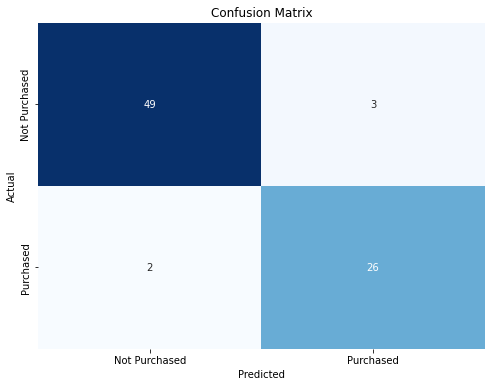

In [162]:
# Generate confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

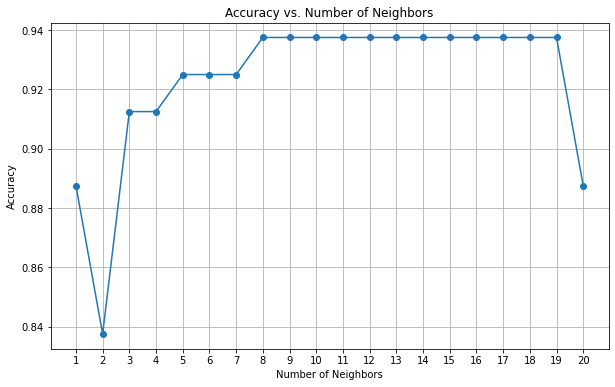

In [163]:
# Find the best n_neighbors
max_neighbors = 20
accuracy_scores = []

for n_neighbors in range(1, max_neighbors + 1):
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(X_train_scaled_encoded, y_train)
    y_pred = knn_classifier.predict(X_test_scaled_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), accuracy_scores, marker='o')
plt.title("Accuracy vs. Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_neighbors + 1))
plt.grid(True)
plt.show()

## Handling Imbalanced Data in Classification

Handling imbalanced data is a crucial step in machine learning, particularly for classification tasks. Imbalanced data refers to a situation where one class in the target variable has significantly fewer instances than the other class. This imbalance can lead to biased model performance and skewed evaluations. Let's explore why handling imbalanced data is important:

### Biased Model Performance
Imbalanced data can cause the model to be biased towards the majority class, resulting in poor performance on the minority class. This is a concern when the minority class represents critical instances, such as fraud detection or rare disease diagnosis.

### Misleading Evaluation Metrics
Traditional accuracy is not reliable for imbalanced data since a high accuracy score can be achieved by predicting the majority class. Evaluation metrics like precision, recall, F1-score, and AUC-ROC provide a more accurate assessment of model performance.

### Generalization and Overfitting
Imbalanced data can lead to overfitting, where the model memorizes the majority class but struggles to generalize to new data. This hampers the model's ability to perform well in real-world scenarios.

### Rare Event Detection
In cases where the goal is to identify rare events, such as anomalies or rare diseases, an imbalanced dataset makes it challenging for the model to detect these events effectively.

### Addressing Business Needs
In many applications, misclassifying instances from the minority class can have a higher cost than misclassifying instances from the majority class. Balancing the class distribution helps the model prioritize identifying instances from the minority class.

## Techniques for Handling Imbalance

Several techniques can be employed to handle imbalanced data:

1. **Resampling**: Oversampling the minority class or undersampling the majority class can balance the class distribution. Techniques like SMOTE generate synthetic examples to improve balance.

2. **Algorithm Choice**: Certain algorithms are inherently robust to imbalanced data, such as decision trees and ensemble methods like Random Forest and Gradient Boosting.

3. **Cost-sensitive Learning**: Assigning different misclassification costs to classes during training can make the model more sensitive to the minority class.

4. **Ensemble Methods**: Combining predictions from multiple models can enhance performance on imbalanced data.

5. **Using Appropriate Metrics**: Precision, recall, F1-score, AUC-ROC, and other metrics provide a more comprehensive view of model performance on imbalanced datasets.

In conclusion, handling imbalanced data is crucial to ensure that machine learning models perform well, especially when dealing with scenarios where the minority class is of significant interest. Proper preprocessing techniques and thoughtful evaluation can lead to more accurate predictions and better model outcomes.


<img src = "https://d3i71xaburhd42.cloudfront.net/b5c14e750010e5351c13294fb10552bf3052359d/2-Figure1-1.png" width=100%>

In [164]:
# Load the dataset
data = pd.read_csv("Social_Network_Ads.csv")

# Select features and target variable
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [165]:
# Check class distribution
print("Class distribution:\n", y.value_counts())

Class distribution:
 0    257
1    143
Name: Purchased, dtype: int64


In [166]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
X_train

,Gender,Age,EstimatedSalary
3,Female,27,57000
18,Male,46,28000
202,Female,39,134000
250,Female,44,39000
274,Female,57,26000
...,...,...,...
71,Female,24,27000
106,Female,26,35000
270,Female,43,133000
348,Male,39,77000


In [168]:
# Feature scaling and one-hot encoding
column_transformer = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), ['Age', 'EstimatedSalary']),
    ('encoder', OneHotEncoder(drop='first'), ['Gender'])
])
X_train_scaled_encoded = column_transformer.fit_transform(X_train)
X_test_scaled_encoded = column_transformer.transform(X_test)

In [169]:
X_train_scaled_encoded

array([[-1.06675246, -0.38634438,  0.        ],
       [ 0.79753468, -1.22993871,  1.        ],
       [ 0.11069205,  1.853544  ,  0.        ],
       [ 0.60129393, -0.90995465,  0.        ],
       [ 1.87685881, -1.28811763,  0.        ],
       [-0.57615058,  1.44629156,  1.        ],
       [ 0.3069328 , -0.53179168,  1.        ],
       [ 0.99377543,  0.10817643,  1.        ],
       [-1.16487283,  0.45724994,  1.        ],
       [-1.55735433,  0.31180264,  1.        ],
       [ 1.0918958 ,  0.45724994,  1.        ],
       [-0.18366908, -0.47361276,  0.        ],
       [ 0.20881242, -0.32816546,  1.        ],
       [ 0.3069328 ,  0.28271318,  0.        ],
       [-1.16487283, -1.57901222,  1.        ],
       [ 0.11069205,  0.25362372,  0.        ],
       [ 2.07309956,  1.73718616,  1.        ],
       [ 0.40505317, -0.18271817,  1.        ],
       [ 1.4843773 ,  2.11534913,  0.        ],
       [-0.37990983,  1.21357589,  1.        ],
       [ 1.87685881,  1.50447048,  0.   

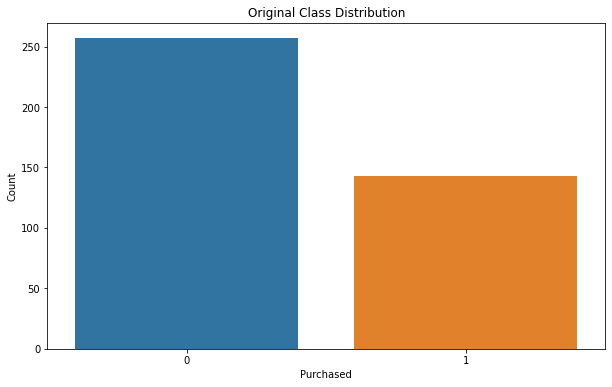

In [170]:
# Original class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Purchased')
plt.title("Original Class Distribution")
plt.xlabel("Purchased")
plt.ylabel("Count")
plt.show()

In [172]:
# Handle class imbalance using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled_encoded, y_train)

# ros = SMOTE()
# x_train,y_train = oversample.fit_resample(X_train_scaled_encoded,y_train)

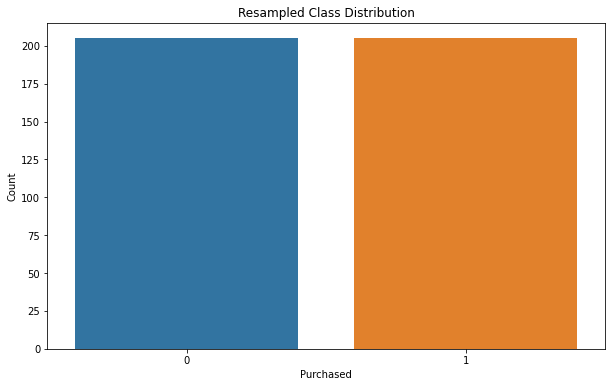

In [173]:
# Resampled class distribution
plt.figure(figsize=(10, 6))
sns.countplot(y_train_resampled)
plt.title("Resampled Class Distribution")
plt.xlabel("Purchased")
plt.ylabel("Count")
plt.show()

In [174]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the KNN classifier on resampled data
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = knn_classifier.predict(X_test_scaled_encoded)

In [175]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (with resampling):", accuracy)

Accuracy (with resampling): 0.9125


In [176]:
# Generate classification report
class_names = ["Not Purchased", "Purchased"]
print("\nClassification Report (with resampling):")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report (with resampling):
               precision    recall  f1-score   support

Not Purchased       0.96      0.90      0.93        52
    Purchased       0.84      0.93      0.88        28

     accuracy                           0.91        80
    macro avg       0.90      0.92      0.91        80
 weighted avg       0.92      0.91      0.91        80



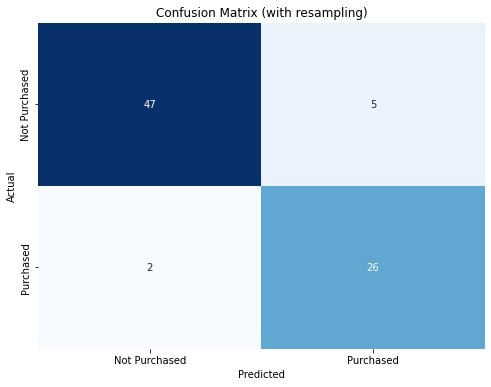

In [177]:
# Generate confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (with resampling)")
plt.show()

In [178]:
# Find the best n_neighbors for original data
max_neighbors = 20
accuracy_scores_original = []

for n_neighbors in range(1, max_neighbors + 1):
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(X_train_scaled_encoded, y_train)
    y_pred = knn_classifier.predict(X_test_scaled_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_original.append(accuracy)

In [181]:
# Find the best n_neighbors for resampled data
accuracy_scores_resampled = []

for n_neighbors in range(1, max_neighbors + 1):
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(X_train_resampled, y_train_resampled)
    y_pred = knn_classifier.predict(X_test_scaled_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_resampled.append(accuracy)

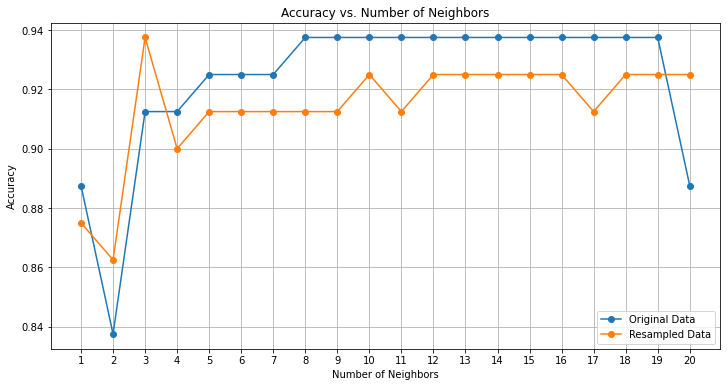

In [182]:
# Plot the accuracy scores for original and resampled data
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_neighbors + 1), accuracy_scores_original, marker='o', label='Original Data')
plt.plot(range(1, max_neighbors + 1), accuracy_scores_resampled, marker='o', label='Resampled Data')
plt.title("Accuracy vs. Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(range(1, max_neighbors + 1))
plt.legend()
plt.grid(True)
plt.show()

## Naïve Bayes Resample

In [183]:
# Initialize the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

In [184]:
# Train the Naive Bayes classifier on resampled data
naive_bayes_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test_scaled_encoded)

In [185]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Naive Bayes with resampling):", accuracy)

Accuracy (Naive Bayes with resampling): 0.925


In [187]:
# Generate classification report
class_names = ["Not Purchased", "Purchased"]
print("\nClassification Report (Naive Bayes with resampling):")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report (Naive Bayes with resampling):
               precision    recall  f1-score   support

Not Purchased       0.98      0.90      0.94        52
    Purchased       0.84      0.96      0.90        28

     accuracy                           0.93        80
    macro avg       0.91      0.93      0.92        80
 weighted avg       0.93      0.93      0.93        80



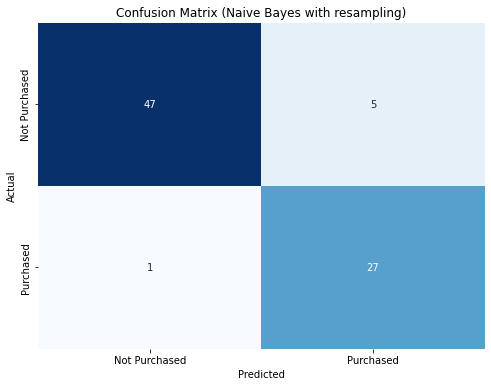

In [188]:
# Generate confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Naive Bayes with resampling)")
plt.show()